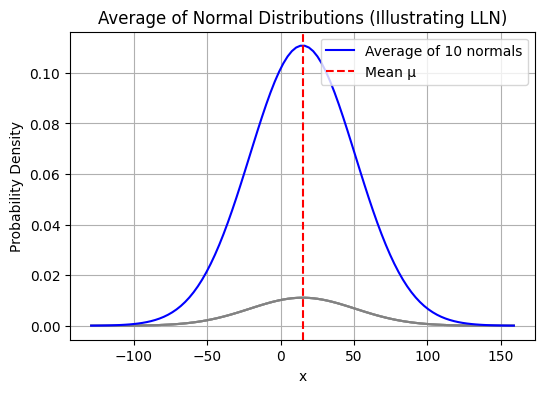

In [1]:
# LLN simulation: averaging multiple normal distributions
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def normal_XY(mu, sigma):
    """
    Returns x-values and the corresponding PDF values for a normal distribution.
    x spans ±4σ around the mean.
    """
    xs = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    ys = norm.pdf(xs, mu, sigma)
    return xs, ys

# Parameters
mu, sigma = 15, 36
n_distributions = 10  # number of distributions to average

# Generate and sum multiple PDFs
xs, _ = normal_XY(mu, sigma)
ys_sum = np.zeros_like(xs)

# Optional: overlay individual distributions in light gray
fig, ax = plt.subplots(figsize=(6,4))
for i in range(n_distributions):
    _, ys = normal_XY(mu, sigma)
    ys_sum += ys
    ax.plot(xs, ys, color='gray', alpha=0.3, label='_nolegend_')  # faint individual PDFs

# Average of all distributions
ys_avg = ys_sum / n_distributions
ax.plot(xs, ys_avg, color='b', label=f'Average of {n_distributions} normals')

# Mark the mean
ax.axvline(mu, color='r', linestyle='--', label='Mean μ')

# Plot settings
ax.grid(True)
ax.set_title("Average of Normal Distributions (Illustrating LLN)")
ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.legend()

# Save figure (optional)
fig.savefig('img/lln_simulation.png', dpi=300, bbox_inches='tight')

plt.show()
